In [1]:
%pylab inline


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [55]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

# To-Do:

1. Compute the angle for all the LMC models.
2. think about on the orientation of the orbit. Maybe it is already taken into account in the angle, but check this!

In [75]:


def r_peri(rgal):
    return min(rgal)
    
def tidal_radius(Mmw, Msat, rperi, Mb, Md, c):
    Mmw_peri = soda.profiles.mass_NFW(c, 0,0,rperi, Mmw) + Mb + Md
    #r_t = rperi*(Msat/(2.*Mmw_peri))**(1/3.)
    r_t = rperi*(Msat/(2.*Mmw_peri))**(1/3.)
    return r_t

def angular_m(r, v):
    L = np.cross(r,v)
    return L/np.linalg.norm(L)

In [46]:
def read_data_sag(filename):
    data = np.loadtxt(filename)
    t = data[:,0]
    x_ngc = data[:,1]
    y_ngc = data[:,2]
    z_ngc = data[:,3]

    vx_ngc = data[:,4]
    vy_ngc = data[:,5]
    vz_ngc = data[:,6]


    x_sag = data[:,7]
    y_sag = data[:,8]
    z_sag = data[:,9]

    vx_sag = data[:,10]
    vy_sag = data[:,11]
    vz_sag = data[:,12]

    r_ngc = np.array([x_ngc, y_ngc, z_ngc]).T
    v_ngc = np.array([vx_ngc, vy_ngc, vz_ngc]).T

    r_sag = np.array([x_sag, y_sag, z_sag]).T
    v_sag = np.array([vx_sag, vy_sag, vz_sag]).T
    
    return t, r_ngc,  v_ngc, r_sag, v_sag

def orbits_ang(filename):
    t, r1, v1, r2, v2 = read_data_sag(filename)
    L_NGC = angular_m(r1, v1)
    L_sag = angular_m(r2, v2)
    orb_dot = np.zeros(len(t))
    for i in range(len(t)):
        norm_NGC =  np.linalg.norm(L_NGC[i])
        norm_sag =  np.linalg.norm(L_sag[i])
        orb_dot[i] = np.dot(L_NGC[i]/norm_NGC, L_sag[i]/norm_sag)
    return t, arccos(orb_dot)*180/np.pi

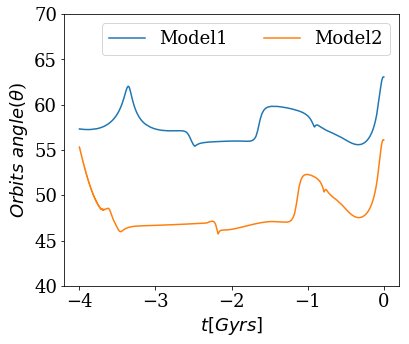

In [74]:
t, Lh = orbits_ang('MWhSgr_ICs0.txt')
t2, Ll = orbits_ang('MWlSgr_ICs0')

plt.figure(figsize=(6,5))
plt.plot(t2, Ll, label='Model1')
plt.plot(t, Lh,label='Model2')
plt.legend(loc='best', ncol=2)
ylim(40, 70)
xlabel('$t[Gyrs]$')
ylabel(r'$Orbits\ angle( \theta$)')